<div style="text-align: center"> <h1> Werden Gesichter schneller und akurater als andere Gegenstände wahrgenommen? </div> </h1>

Goethe Universität <br>
Wintersemester 2018/2019 <br>
PsyMSc 4: Python für Psychologen <br>
Dozenten: Dr. Dejan Draschkow, Dr.Jona Sassenhagen<br>
<br>
Datum: 18.03.2018 <br>
<br>
Nathalie Siebert <br>
Matrikelnummer: 5456738 <br>
E-Mail: Nathalie Siebert@web.de <br>

<h2> Einleitung </h2>

Gesichter und Gesichtsausdrücke spielen in unserem Leben eine wichtige Rolle. Bereits bei Neugeborenen lässt sich eine Präferenz von Gesichtern oder gesichtsähnlichen Strukturen gegenüber anderen Objekten finden (Valenza, Simion, Cassia & Umiltà, 1996). Yin (1969) konnte herausfinden, dass Gesichter schneller erkannt werden als andere Objekte, wie Häuser oder Flugzeuge. Deswegen wird in diesem Experiment angenommen, dass Gesichter schneller (H1) und akkurater (H2) erkannt werden als andere Objekte. <br>

Die Autoren Papeo, Stein, und Soto-Faraco (2017) konnten zudem herausfinden, dass Körper, die einander zugewandt sind, akkurater erkannt werden als Körper die voneinander weggedreht sind. In der Reaktionszeit haben die Autoren jedoch keinen Unterschied finden können. Diese Befunde werden hier versucht auf Gesichter zu übertragen. Es wird angenommen, dass Gesichter die einander zugewandt sind, akkurater (H3) aber nicht schneller (H4) erkannt werden als Gesichter die einander abgewandt sind.

<h2>Versuchsablauf</h2>

An dem Experiment nahmen 5 Teilnehmer teil. Die Teilnehmer sahen bei jedem Durchgang zuerst einen schwarzen Bildschirm. Im Anschluss daran erschien ein Fixationskreuz, gefolgt von einem Target. Das Target bestand aus zwei Bildern. Auf diesen Bildern waren jeweils entweder zwei Gesichter oder zwei Stühle zu sehen. Diese Gesichter oder Stühle konnten einander zugewandt oder abgewandt sein. Die Teilnehmer sollten durch Tastendruck angeben, ob sie Gesichter oder Stühle gesehen haben. 

In [1]:
%matplotlib inline

import matplotlib as mpl
import pandas as pd
import seaborn as sns
import numpy as np
import math
from scipy import stats
from glob import glob
from scipy.stats import ttest_rel, ttest_ind, f_oneway
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from glob import glob
from scipy import stats
from scipy.stats import wilcoxon

C:\Users\Christopher John\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Daten importieren

In [2]:
all_dfs = list()
for ii, file in enumerate(glob("*")):  
    if file.endswith(".csv"): 
        try:
            df = pd.read_csv(file)
            all_dfs.append(df)
        except Exception:
            pass
df = pd.concat(all_dfs)

Daten Ansicht 

In [3]:
df.head()

,subject_nr,type,correct_response,response,acc,congruency,response_time
0,1,face,y,y,1,0,1012.583212
1,1,face,y,y,1,1,648.644576
2,1,face,y,y,1,0,150.911285
3,1,face,y,y,1,0,114.316910
4,1,chair,m,m,1,0,160.282425


In [4]:
df.mean()

subject_nr         3.000000
acc                0.947222
congruency         0.222222
response_time    223.972539
dtype: float64

In [5]:
df.std()

subject_nr         1.416182
acc                0.223901
congruency         0.416318
response_time    339.232575
dtype: float64

Daten nach Probanden auflisten

In [6]:
df.groupby("subject_nr").mean()

,acc,congruency,response_time
subject_nr,,,
1,0.986111,0.222222,233.712603
2,0.916667,0.222222,178.896551
3,0.930556,0.222222,294.572872
4,0.958333,0.222222,165.612039
5,0.944444,0.222222,247.068632


Reaktionszeit anschauen, um nach Außreißern zu suchen

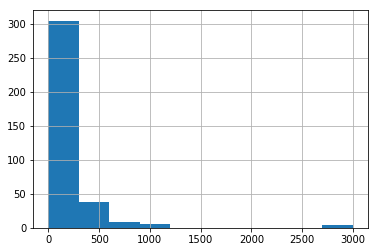

In [7]:
df["response_time"].hist() 

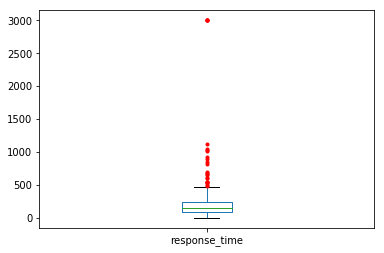

In [8]:
df["response_time"].plot(kind="box", sym='r.')

In [9]:
Abweichung_rt= 3*df["response_time"].std()
Abweichung_rt

1017.6977244205543

In [10]:
df["response_time"].mean()+Abweichung_rt

1241.670263888992

In [11]:
df["response_time"].mean()-Abweichung_rt

-793.7251849521167

Ab einer Standardabweichung von 3 über oder unter dem Durchschnitt gilt der Wert hier als Ausreißer und wird ausgeschlossen. 

<h5>Neuer bereinigter Datensatz </h5>

In [12]:
df_clear= df.query("response_time < 1241.670264")

In [13]:
df_clear.head()

,subject_nr,type,correct_response,response,acc,congruency,response_time
0,1,face,y,y,1,0,1012.583212
1,1,face,y,y,1,1,648.644576
2,1,face,y,y,1,0,150.911285
3,1,face,y,y,1,0,114.316910
4,1,chair,m,m,1,0,160.282425


Daten Ansicht

In [14]:
df_clear.mean()

subject_nr         2.997191
acc                0.957865
congruency         0.219101
response_time    192.780939
dtype: float64

In [15]:
df_clear.std()

subject_nr         1.419182
acc                0.201179
congruency         0.414219
response_time    169.015724
dtype: float64

Datensatz nach Probanden aufgeschlüsselt

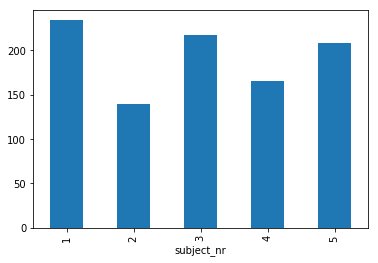

In [16]:
rt_by_subj = df_clear.groupby("subject_nr").mean()["response_time"]
rt_by_subj.mean()
rt_by_subj.plot(kind="bar")

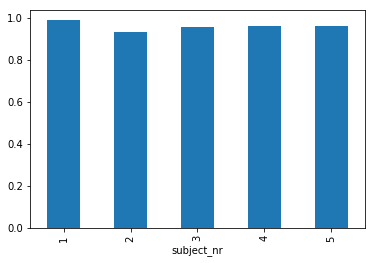

In [17]:
acc_by_subj = df_clear.groupby("subject_nr").mean()["acc"]
acc_by_subj.mean()
acc_by_subj.plot(kind="bar")

<h5>H1: Gesichter werden schneller wahrgenommen als Stühle.</h5>

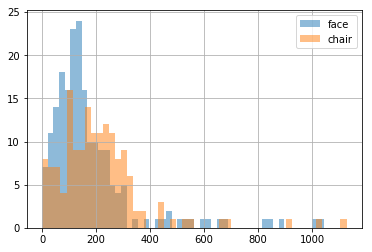

In [18]:
for cond in df["type"].unique():
    query = "type == '" + cond + "'"
    df_clear.query(query)["response_time"].hist(bins=50, label=cond, alpha=.5)  
import matplotlib.pyplot as plt
plt.legend() 

In [19]:
h1= df_clear.groupby(["subject_nr","type"]).mean()["response_time"].reset_index()
h1

,subject_nr,type,response_time
0,1,chair,177.676790
1,1,face,278.541253
2,2,chair,154.333243
3,2,face,126.714558
4,3,chair,293.600590
5,3,face,160.029133
6,4,chair,200.222938
7,4,face,137.923320
8,5,chair,236.037884
9,5,face,186.793783


In [20]:
type(h1)

pandas.core.frame.DataFrame

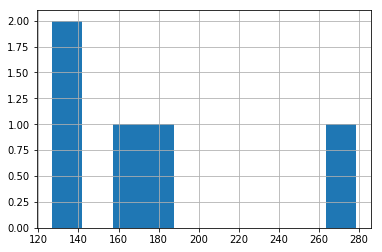

In [21]:
rt_face = h1.query("type == 'face'")["response_time"]
rt_face.hist()

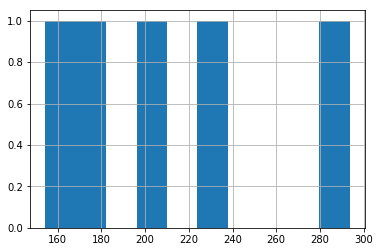

In [22]:
rt_chair = h1.query("type == 'chair'")["response_time"]
rt_chair.hist()

Daten normalverteilt?

In [23]:
stats.kstest(rt_chair, "norm"), stats.kstest(rt_face, "norm")

(KstestResult(statistic=1.0, pvalue=0.0),
 KstestResult(statistic=1.0, pvalue=0.0))

Da die Daten nicht normalverteilt sind, wird im Folgenden neben dem t-Test auch der robustere Wilcoxon-Test verwendet.

In [24]:
wilcoxon(rt_face, rt_chair)

C:\Users\Christopher John\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2397: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


WilcoxonResult(statistic=4.0, pvalue=0.34523107177183998)

In [25]:
p = wilcoxon(rt_chair, rt_face)[-1]
message = "Nach dem Wilcoxon-Test unterscheidet sich die Reaktionszeit"
print(message,
      "" if p < 0.05 else "nicht",
      "signifikant voneinander.")

Nach dem Wilcoxon-Test unterscheidet sich die Reaktionszeit nicht signifikant voneinander.


C:\Users\Christopher John\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2397: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


In [26]:
ttest_ind(rt_face, rt_chair)

Ttest_indResult(statistic=-0.94213604276694607, pvalue=0.37369899435414022)

In [27]:
t, p = ttest_rel(rt_face, rt_chair)
is_significant = p < .05

print("Nach dem t-Test werden Gesichter", 
      ("" if is_significant else "nicht"),
      "signifikant schneller wahrgenommen als Stühle.")

Nach dem t-Test werden Gesichter nicht signifikant schneller wahrgenommen als Stühle.


Aufgrund der geringen Stichprobenanzahl sind die Daten eigentlich für eine Aussage zur Normalverteilung zu klein. Deswegen wird im Folgenden nur mit dem t-Test weitergerechnet und auf eine weitere Überprüfung der Daten auf Normalverteilung verzichtet.

<h5>H2: Gesichter werden akkurater erkannt als Stühle.</h5>

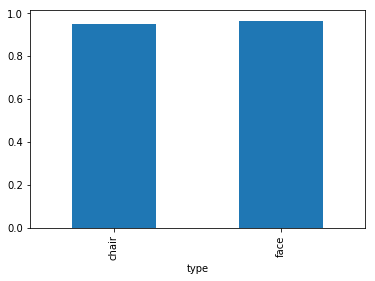

In [28]:
grouped_h2 = df_clear.groupby("type")["acc"]
grouped_h2.mean().plot(kind="bar")

In [29]:
h2= df_clear.groupby(["subject_nr","type"]).mean()["acc"].reset_index()

In [30]:
type(h2)

pandas.core.frame.DataFrame

In [31]:
acc_face = h2.query("type == 'face'")["acc"]
acc_chair = h2.query("type == 'chair'")["acc"]

In [32]:
ttest_ind(acc_face, acc_chair)

Ttest_indResult(statistic=0.9103768513854007, pvalue=0.38922926149582804)

In [33]:
t, p = ttest_rel(acc_face, acc_chair)
is_significant = p < .05

print("Gesichter werden", 
      ("" if is_significant else "nicht"),
      "akurater erkannt als Stühle.")

Gesichter werden nicht akurater erkannt als Stühle.


<h5>H3: Gesichter die einander zugewandt sind, werden akturater wahrgenommen.</h5>

In [34]:
df_face= df_clear.query("type == 'face'")

In [35]:
df_face.head()

,subject_nr,type,correct_response,response,acc,congruency,response_time
0,1,face,y,y,1,0,1012.583212
1,1,face,y,y,1,1,648.644576
2,1,face,y,y,1,0,150.911285
3,1,face,y,y,1,0,114.316910
5,1,face,y,y,1,0,340.972010


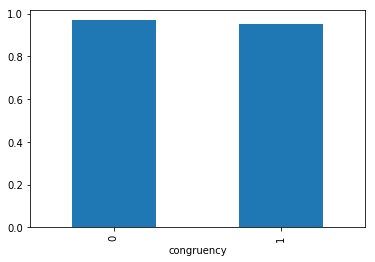

In [36]:
grouped_h3 = df_face.groupby("congruency")["acc"]
grouped_h3.mean().plot(kind="bar")

In [37]:
h3= df_face.groupby(["subject_nr","congruency"]).mean()["acc"].reset_index()

In [38]:
type(h3)

pandas.core.frame.DataFrame

In [39]:
h3

,subject_nr,congruency,acc
0,1,0,0.968750
1,1,1,1.000000
2,2,0,0.935484
3,2,1,1.000000
4,3,0,0.937500
5,3,1,1.000000
6,4,0,1.000000
7,4,1,0.875000
8,5,0,1.000000
9,5,1,0.875000


In [40]:
con_yes_acc = h3.query("congruency == 1")["acc"]
con_no_acc = h3.query("congruency == 0")["acc"]

In [41]:
ttest_ind(con_yes_acc, con_no_acc)

Ttest_indResult(statistic=-0.54355730650461132, pvalue=0.60156009998874349)

In [42]:
t, p = ttest_rel(con_yes_acc, con_no_acc)
is_significant = p < .05

print("Gesichter die einander zugewandt sind, werden", 
      ("" if is_significant else "nicht"),
      "signifiant akurater wahrgenommen.")

Gesichter die einander zugewandt sind, werden nicht signifiant akurater wahrgenommen.


<h5> H4: Gesichter die einander zugewandt sind, werden nicht schneller erkannt als Gesichter die einander abgewand sind. </h5>

In [44]:
h4= df_face.groupby(["subject_nr","congruency"]).mean()["response_time"].reset_index()

In [45]:
type(h4)

pandas.core.frame.DataFrame

In [46]:
h4

,subject_nr,congruency,response_time
0,1,0,259.839113
1,1,1,353.349816
2,2,0,122.643619
3,2,1,142.489449
4,3,0,177.472750
5,3,1,90.254662
6,4,0,135.421087
7,4,1,147.932250
8,5,0,198.401472
9,5,1,140.363025


In [47]:
con_yes_rt = h3.query("congruency == 1")["acc"]
con_no_rt = h3.query("congruency == 0")["acc"]

In [48]:
ttest_ind(con_yes_rt, con_no_rt)

Ttest_indResult(statistic=-0.54355730650461132, pvalue=0.60156009998874349)

In [49]:
t, p = ttest_rel(con_yes_rt, con_no_rt)
is_significant = p < .05

print("Gesichter die einander zugewandt sind, werden", 
      ("" if is_significant else "nicht"),
      "signifikant schneller erkannt als Gesichter die einander abgewandt sind.")

Gesichter die einander zugewandt sind, werden nicht signifikant schneller erkannt als Gesichter die einander abgewandt sind.


<h2>Disskusion</h2>

Die Hypothesen, das Gesichter schneller und akturater erkannt werden als andere Objekte, konnten in diesem Experiment mit Stühlen, als andere Objekte, nicht bestätigt werden. Zudem wurden die Ergebnisse von Papeo et al. (2017) nur teilweise für Gesichter bestätigt. Es konnte nicht gefunden werden, dass Gesichter die einander zugewandt sind, akkurater wahrgenommen werden. Jedoch konnte auch hier gefunden werden, dass Gesichter die einander zugewandt sind nicht schneller erkannt werden als Gesichter, die abgewandt zueinander sind.

Das die Ergebnisse nicht signifikant wurden, mag aber auch an der geringen Teilnehmeranzahl liegen. In nachfolgenden Experimenten sollte die Teilnehmerzahl erhöht werden. Zudem wäre es ratsam, neben den Stühlen auch noch weitere Objekte zu verwenden.

<h2>Quellen</h2>

Papeo, L., Stein, T., & Soto-Faraco, S. (2017). The two-body inversion effect. *Psychological science, 28*(3), 369-379.<br>
Yin, R. K. (1969). Looking at upside-down faces. *Journal of experimental psychology, 81*(1), 141-145. <br>
Valenza, E., Simion, F., Cassia, V. M., & Umiltà, C. (1996). Face preference at birth. *Journal of experimental psychology: Human Perception and Performance, 22*(4), 892-903.